The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
calculated force in: 22.17743676022148
calculated force out: 2079.7610950161807


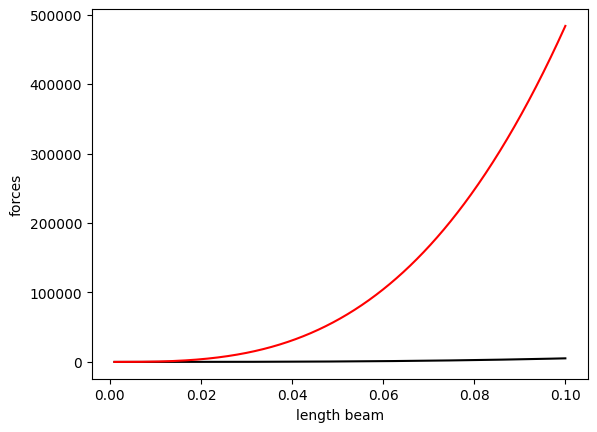

In [36]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

def find_closest_index(array, n, t):
    # Convert array to a NumPy array if it's not already one
    array = np.asarray(array)
    
    # Calculate absolute differences between array elements and target number n
    differences = np.abs(array - n)
    
    # Find indices where the difference is within the threshold t
    within_threshold_indices = np.where(differences <= t)[0]
    
    # If no values are within the threshold, return None
    if len(within_threshold_indices) == 0:
        return None
    
    # Find the index of the minimum difference within the threshold
    closest_index = within_threshold_indices[np.argmin(differences[within_threshold_indices])]
    
    return closest_index

elastic_modulus = 2900e6
width_beam = 0.01
length_beam = 1e-1
height_beam = np.linspace(0.001,1e-1,1000)
deflection = 0.0004
friction_coefficient = 0.5
I_beam = (width_beam * height_beam**3) / 12
angle_deg = 85
angle_rad = np.deg2rad(angle_deg)
force_location = length_beam - deflection / np.tan(angle_rad)

force_hand_in = ((3 * elastic_modulus * I_beam) / (force_location**3)) * deflection * (friction_coefficient * np.cos(angle_rad) + np.sin(angle_rad)) / (friction_coefficient * np.sin(angle_rad) + np.cos(angle_rad))

force_hand_out = 2 * elastic_modulus * I_beam / force_location**2

in_index = find_closest_index(force_hand_in, 22, 5)
out_index = find_closest_index(force_hand_out, 44, 5)

print(f"calculated force in: {force_hand_in[in_index]}")
print(f"calculated force out: {force_hand_out[in_index]}")

plt.figure()
plt.plot(height_beam,force_hand_in,'black')
plt.plot(height_beam,force_hand_out,'red')
plt.xlabel('length beam')
plt.ylabel('forces')
plt.show()
